<a href="https://colab.research.google.com/github/MatheusRobles/Projeto_Pandas/blob/main/Analise_Exploratoria_Amazonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


https://www.kaggle.com/datasets/mbogernetto/brazilian-amazon-rainforest-degradation

Sobre o conjunto de dados Contexto A floresta amazônica é uma floresta tropical úmida de folhas largas no bioma amazônico que cobre o território pertencente a nove nações. A maior parte da floresta está contida no Brasil, com 60% da floresta tropical, seguido pelo Peru com 13%, Colômbia com 10% e com quantidades menores na Venezuela, Equador, Bolívia, Guiana, Suriname e Guiana Francesa.

A região oferece benefícios importantes para as comunidades que vivem perto e longe. Quase 500 comunidades indígenas chamam a floresta amazônica de lar. É um ecossistema altamente biodiverso, lar de inúmeras espécies de plantas e animais. A floresta tropical pode criar seu próprio clima e influenciar climas em todo o mundo. Infelizmente, o frágil ecossistema enfrenta a constante ameaça de desmatamento e incêndios (por causas naturais ou antrópicas).

O desmatamento ocorre por vários motivos, como agricultura ilegal, desastres naturais, urbanização e mineração. Existem várias maneiras de remover florestas - queima e extração de madeira são dois métodos. Embora o desmatamento esteja acontecendo em todo o mundo hoje, é uma questão especialmente crítica na floresta amazônica, como a única grande floresta ainda existente no mundo. Lá, as espécies de plantas e animais que abrigam vêm desaparecendo em ritmo alarmante.

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

df = pd.read_csv("def_area_2004_2019.csv")
df

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911
5,2009,167,405,70,828,1049,4281,482,121,61,7464
6,2010,259,595,53,712,871,3770,435,256,49,7000
7,2011,280,502,66,396,1120,3008,865,141,40,6418
8,2012,305,523,27,269,757,1741,773,124,52,4571
9,2013,221,583,23,403,1139,2346,932,170,74,5891


In [6]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv("/content/drive/MyDrive/Projeto_Python/def_area_2004_2019.csv")
df



,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911
5,2009,167,405,70,828,1049,4281,482,121,61,7464
6,2010,259,595,53,712,871,3770,435,256,49,7000
7,2011,280,502,66,396,1120,3008,865,141,40,6418
8,2012,305,523,27,269,757,1741,773,124,52,4571
9,2013,221,583,23,403,1139,2346,932,170,74,5891


In [2]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Ano/Estados'], y=df['AMZ LEGAL'], mode='lines+markers'))

# Atualizando layout do gráfico
fig.update_layout(title='Desmatamento Amazônia Legal', xaxis_title='Ano', yaxis_title='Área (km²)')

# Exibindo o gráfico
fig.show()

Valores das áreas totais
2004 foi o ano que houve mais desmatamentos da história com um total de 27.772 km²

2005 foi o segundo ano com mais desmatamentos com um total de 19.014 km²

2008 subiu 10% do ano anterior com 12.911 km²

2012 teve o menor índice de desmatamento com 4.571 km²

2019 foi o ano com mais desmatamentos desde 2008, com 9.762 km²

In [3]:
df['AREA DESM_TOTAL'] = df['AMZ LEGAL'].cumsum()
df

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL,AREA DESM_TOTAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014,46786
2,2006,398,788,30,674,4333,5659,2049,231,124,14286,61072
3,2007,184,610,39,631,2678,5526,1611,309,63,11651,72723
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911,85634
5,2009,167,405,70,828,1049,4281,482,121,61,7464,93098
6,2010,259,595,53,712,871,3770,435,256,49,7000,100098
7,2011,280,502,66,396,1120,3008,865,141,40,6418,106516
8,2012,305,523,27,269,757,1741,773,124,52,4571,111087
9,2013,221,583,23,403,1139,2346,932,170,74,5891,116978


In [4]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Ano/Estados'], y=df['AREA DESM_TOTAL'], 
                         mode='lines+markers', 
                         name='Área desmatada total acumulada'))

fig.update_layout(title='Área desmatada total acumulada na Amazônia Legal (2004-2019)',
                  xaxis_title='Ano', yaxis_title='Área desmatada total acumulada (km²)')

fig.show()

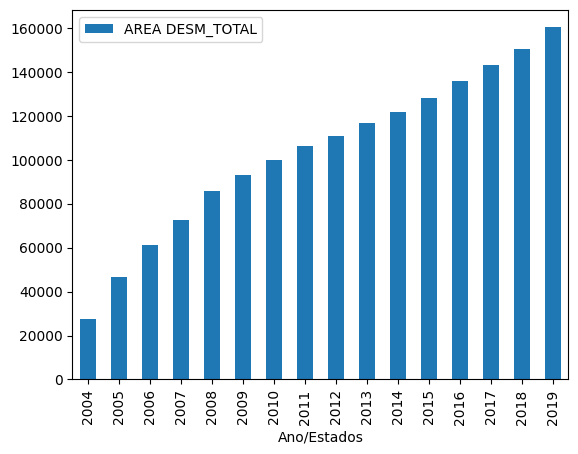

In [5]:
import matplotlib.pyplot as plt
# Gráfico de barras
df.plot.bar(x="Ano/Estados", y="AREA DESM_TOTAL")

# Mostrar o gráfico
plt.show()

Encontrar dados com informação da população de especies da amazonia ao decorrer dos anos e avaliar mudanças, ver o impacto de criação de orgs ou qualquer outra forma de prevenção dos animais e avaliar o impacto.

##### Segunda database

In [2]:
df2 = pd.read_csv('inpe_brazilian_amazon_fires_1999_2019.csv')
df2

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1
...,...,...,...,...,...,...
2099,2019,12,MATO GROSSO,-12.138385,-56.066297,148
2100,2019,12,PARA,-2.976727,-50.909316,1280
2101,2019,12,RONDONIA,-10.809262,-62.890452,42
2102,2019,12,RORAIMA,2.856667,-60.431963,27


Adicionando a coluna com a região de cada estado, para analisar os focos por regiões

In [5]:
#dicionário estados - região
regioes = {'ACRE': 'Norte',
 'ALAGOAS': 'Nordeste',
 'AMAPA': 'Norte',
 'AMAZONAS': 'Norte',
 'BAHIA': 'Nordeste',
 'CEARA': 'Nordeste',
 'DISTRITO FEDERAL': 'Centro-Oeste',
 'ESPIRITO SANTO': 'Sudeste',
 'GOIAS': 'Centro-Oeste',
 'MARANHAO': 'Nordeste',
 'MATO GROSSO': 'Centro-Oeste',
 'MATO GROSSO DO SUL': 'Centro-Oeste',
 'MINAS GERAIS': 'Sudeste',
 'PARA': 'Norte',
 'PARAIBA': 'Nordeste',
 'PARANA': 'Sul',
 'PERNAMBUCO': 'Nordeste',
 'PIAUI': 'Nordeste',
 'RIO DE JANEIRO': 'Sudeste',
 'RIO GRANDE DO NORTE': 'Nordeste',
 'RIO GRANDE DO SUL': 'Sul',
 'RONDONIA': 'Norte',
 'RORAIMA': 'Norte',
 'SANTA CATARINA': 'Sul',
 'SAO PAULO': 'Sudeste',
 'SERGIPE': 'Nordeste',
 'TOCANTINS': 'Norte'}

In [6]:
#criando uma nova coluna
df2['region'] = df2['state']
df2['region'].replace(regioes,inplace=True)
df2

,year,month,state,latitude,longitude,firespots,region
0,1999,1,AMAZONAS,-2.371113,-59.899933,3,Norte
1,1999,1,MARANHAO,-2.257395,-45.487831,36,Nordeste
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18,Centro-Oeste
3,1999,1,PARA,-2.474820,-48.546967,87,Norte
4,1999,1,RONDONIA,-12.861700,-60.513100,1,Norte
...,...,...,...,...,...,...,...
2099,2019,12,MATO GROSSO,-12.138385,-56.066297,148,Centro-Oeste
2100,2019,12,PARA,-2.976727,-50.909316,1280,Norte
2101,2019,12,RONDONIA,-10.809262,-62.890452,42,Norte
2102,2019,12,RORAIMA,2.856667,-60.431963,27,Norte


<Axes: title={'center': 'Focos de Incêndio - 1999 a 2019'}, xlabel='Região', ylabel='Quantidade de focos'>

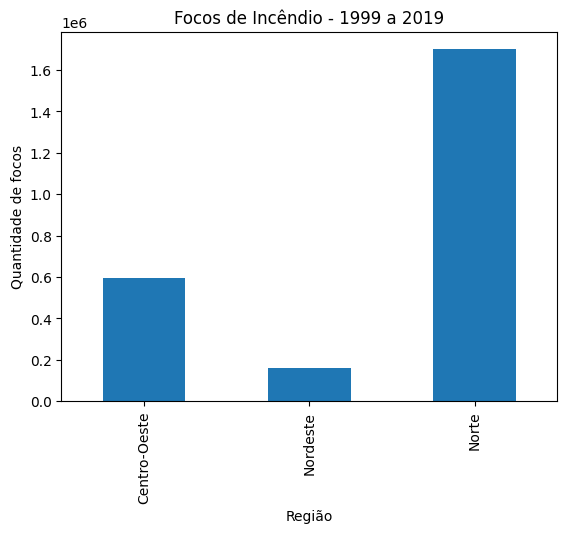

In [16]:
#rever a escala aqui 
df2.groupby('region')['firespots'].sum().plot(kind='bar',xlabel='Região',ylabel='Quantidade de focos',title='Focos de Incêndio - 1999 a 2019')

<Axes: title={'center': 'Focos de Incêndio - 1999 a 2019'}, xlabel='Estado', ylabel='Quantidade de focos'>

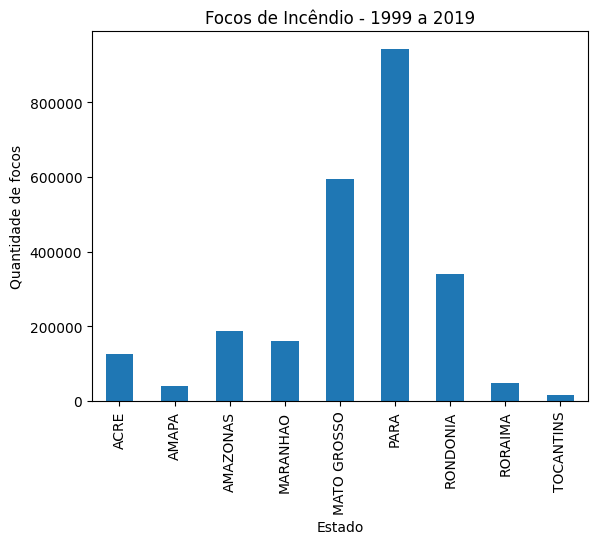

In [17]:
df2.groupby('state')['firespots'].sum().plot(kind='bar',xlabel='Estado',ylabel='Quantidade de focos',title='Focos de Incêndio - 1999 a 2019')

<Axes: title={'center': 'Focos de Incêndio - 1999 a 2019'}, xlabel='Ano', ylabel='Quantidade de focos'>

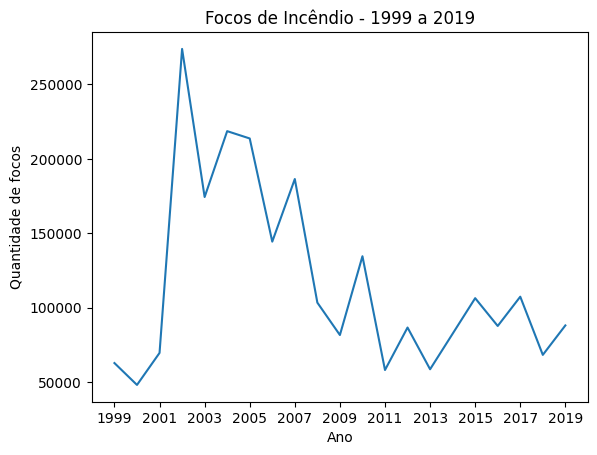

In [39]:
df2.groupby('year')['firespots'].sum().plot(kind='line',xlabel='Ano',ylabel='Quantidade de focos',title='Focos de Incêndio - 1999 a 2019',
                                            xticks=[x for x in range(1999,2020,2)])

**insights:**
- a maior quantia de focos de incêndio acontecem na região norte do país (principalmente Para)
- de 2002 a 2008 foram os anos com mais incidência de focos de incêndio
- 2000, 2011 e 2013 apresentam as menores quantidades totais de focos de incêndio
